# ML Prerequsite test

### How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

The matrix multiplication of a (n, k) matrix A and a (k, m) matrix B results in a (n, m) matrix C. To compute each element C[i][j], you need to perform k multiplications and k-1 additions. Therefore, for the entire matrix C, you would perform n * m * k multiplications and n * m * (k-1) additions.

### Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [33]:
import time
import numpy as np
import pandas as pd

In [2]:
n, k, m = 100, 50, 80
matrix_A = np.random.rand(n, k)
matrix_B = np.random.rand(k, m)

List

In [11]:
n = len(matrix_A)
k = len(matrix_A[0])
m = len(matrix_B[0])

    # Initialize result matrix C with zeros
C = [[0] * m for _ in range(n)]
start_time_lists = time.time()


for i in range(n):
    for j in range(m):
        for p in range(k):
            C[i][j] += matrix_A[i][p] * matrix_B[p][j]
end_time_lists = time.time()


use numpy

In [12]:
start_time_numpy = time.time()

C=np.dot(matrix_A, matrix_B)

end_time_numpy = time.time()

Compare the timing of both solutions

In [14]:

time_lists = end_time_lists - start_time_lists
time_numpy = end_time_numpy - start_time_numpy

print(f"Time taken using lists of lists: {time_lists} seconds")
print(f"Time taken using NumPy: {time_numpy} seconds")

if time_lists < time_numpy:
    print("Lists of lists multiplication is faster.")
else:
    print("NumPy multiplication is faster.")

Time taken using lists of lists: 0.25229668617248535 seconds
Time taken using NumPy: 0.004988431930541992 seconds
NumPy multiplication is faster.


reason is that numpy carries out multiply operations parallely hence making it very fast in multiplying matrices.

### Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In this method, you're finding the highest element in one pass, the second-highest in two passes, and so on, until you reach the median. The number of passes required to find the median is approximately n/2 on average.

The total number of operations (passes) can be expressed as the sum of the first n/2 natural numbers:
1+2+3+…+ n/2
 

The sum of the first n natural numbers is given by the formula 
n⋅(n+1)/2
​
 . Therefore, the sum of the first n/2 natural numbers is 

(n/2)⋅(n/2+1)/2
​
 .

The time complexity is determined by the dominant term, and since we are dealing with n/2, the time complexity is 

O((n/2)^2) 

 
O(n^2).

Now, for the second method, let's use bubble sort to sort the array and then find the median. We will compare the timings of this approach with NumPy's median routine:

In [2]:
import time
import numpy as np

# Method 1: O(n^2) approach to find the median
def find_median_slow(arr):
    n = len(arr)
    for i in range((n + 1)//2):
        max_index = i
        for j in range(i+1, n):
            if arr[j] > arr[max_index]:
                max_index = j
        arr[i], arr[max_index] = arr[max_index], arr[i]
    return arr[(n-1)//2]

# Method 2: QuickSelect algorithm to find the median
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_select(arr, low, high, k):
    if low < high:
        pivot_index = partition(arr, low, high)
        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index > k:
            return quick_select(arr, low, pivot_index - 1, k)
        else:
            return quick_select(arr, pivot_index + 1, high, k)

def find_median_quick(arr):
    n = len(arr)
    return quick_select(arr, 0, n - 1, (n + 1)//2 - 1)

# Generate a random array
arr = np.random.rand(10000)

# Time the O(n^2) method
start_time_slow = time.time()
median_slow = find_median_slow(arr.copy())
end_time_slow = time.time()
time_slow = end_time_slow - start_time_slow

# Time the QuickSelect method
start_time_quick = time.time()
median_quick = find_median_quick(arr.copy())
end_time_quick = time.time()
time_quick = end_time_quick - start_time_quick

# Time the NumPy median routine
start_time_numpy = time.time()
median_numpy = np.median(arr)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

# Compare results
print(f"Median (O(n^2) method): {median_slow}")
print(f"Median (QuickSelect method): {median_quick}")
print(f"Median (NumPy): {median_numpy}")

# Compare timings
print(f"Time taken (O(n^2) method): {time_slow} seconds")
print(f"Time taken (QuickSelect method): {time_quick} seconds")
print(f"Time taken (NumPy): {time_numpy} seconds")


Median (O(n^2) method): 0.5009025059895348
Median (QuickSelect method): 0.5008206444745968
Median (NumPy): 0.5008615752320658
Time taken (O(n^2) method): 11.50972294807434 seconds
Time taken (QuickSelect method): 0.00853276252746582 seconds
Time taken (NumPy): 0.0 seconds


### What is the gradient of the following function with respect to x and y?

Partial derivative with respect to x:
2*x*y + y^3*cos(x)

Partial derivative with respect to y:
x^2 + 3*y^2*sin(x)

### Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [3]:
import jax
import jax.numpy as np

# Define a simple function
def my_function(x):
    return x**2 + 3*x + 1

# Use the grad function to obtain the gradient
grad_my_function = jax.grad(my_function)

# Evaluate the gradient at a specific point
x_value = 2.0
gradient_at_x = grad_my_function(x_value)

print(f"Function value at x = {x_value}: {my_function(x_value)}")
print(f"Gradient at x = {x_value}: {gradient_at_x}")

Function value at x = 2.0: 11.0
Gradient at x = 2.0: 7.0


### Use sympy to confirm that you obtain the same gradient analytically.

In [4]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Calculate the partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the results
print("Partial derivative with respect to x:")
print(df_dx)

print("\nPartial derivative with respect to y:")
print(df_dy)


Partial derivative with respect to x:
2*x*y + y**3*cos(x)

Partial derivative with respect to y:
x**2 + 3*y**2*sin(x)


### Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [26]:
Years = {
    2022: {
        'CSE': {
            '1': {'Name': 'Aarav', 'Roll Number': 21110011, 'Marks': {'Maths': 95, 'English': 80, 'Science': 85}},
            '2': {'Name': 'Advait', 'Roll Number': 21110014, 'Marks': {'Maths': 92, 'English': 88, 'Science': 90}}
        },
        'EE': {
            '1': {'Name': 'Vidhi', 'Roll Number': 21110021, 'Marks': {'Maths': 89, 'English': 85, 'Science': 92}},
            '2': {'Name': 'Aryan', 'Roll Number': 21110024, 'Marks': {'Maths': 91, 'English': 87, 'Science': 94}}
        }
    },
    2021: {
        'CSE': {
            '1': {'Name': 'Anaya', 'Roll Number': 21110017, 'Marks': {'Maths': 94, 'English': 82, 'Science': 88}},
            '2': {'Name': 'Arjun', 'Roll Number': 21110026, 'Marks': {'Maths': 96, 'English': 89, 'Science': 91}}
        },
        'EE': {
            '1': {'Name': 'Ishaan', 'Roll Number': 21110031, 'Marks': {'Maths': 93, 'English': 84, 'Science': 87}},
            '2': {'Name': 'Saisha', 'Roll Number': 21110238, 'Marks': {'Maths': 97, 'English': 91, 'Science': 93}}
        }
    }
}

print(Years)


{2022: {'CSE': {'1': {'Name': 'Aarav', 'Roll Number': 21110011, 'Marks': {'Maths': 95, 'English': 80, 'Science': 85}}, '2': {'Name': 'Advait', 'Roll Number': 21110014, 'Marks': {'Maths': 92, 'English': 88, 'Science': 90}}}, 'EE': {'1': {'Name': 'Vidhi', 'Roll Number': 21110021, 'Marks': {'Maths': 89, 'English': 85, 'Science': 92}}, '2': {'Name': 'Aryan', 'Roll Number': 21110024, 'Marks': {'Maths': 91, 'English': 87, 'Science': 94}}}}, 2021: {'CSE': {'1': {'Name': 'Anaya', 'Roll Number': 21110017, 'Marks': {'Maths': 94, 'English': 82, 'Science': 88}}, '2': {'Name': 'Arjun', 'Roll Number': 21110026, 'Marks': {'Maths': 96, 'English': 89, 'Science': 91}}}, 'EE': {'1': {'Name': 'Ishaan', 'Roll Number': 21110031, 'Marks': {'Maths': 93, 'English': 84, 'Science': 87}}, '2': {'Name': 'Saisha', 'Roll Number': 21110238, 'Marks': {'Maths': 97, 'English': 91, 'Science': 93}}}}}


### Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.


In [27]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Create students
student1 = Student("Aarav", 21110011, {'Maths': 95, 'English': 80, 'Science': 85})
student2 = Student("Advait", 21110014, {'Maths': 92, 'English': 88, 'Science': 90})
student3 = Student("Vidhi", 21110021, {'Maths': 89, 'English': 85, 'Science': 92})
student4 = Student("Aryan", 21110024, {'Maths': 91, 'English': 87, 'Science': 94})

# Create branches
cse_branch = Branch("CSE")
cse_branch.add_student(student1)
cse_branch.add_student(student2)

ee_branch = Branch("EE")
ee_branch.add_student(student3)
ee_branch.add_student(student4)

# Create years
year2022 = Year(2022)
year2022.add_branch(cse_branch)
year2022.add_branch(ee_branch)

# Add years to the overall database
overall_database = [year2022]

# Accessing information
print("Student Names in CSE Branch, 2022:")
for student in year2022.branches[0].students:
    print(student.name)


Student Names in CSE Branch, 2022:
Aarav
Advait


### Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

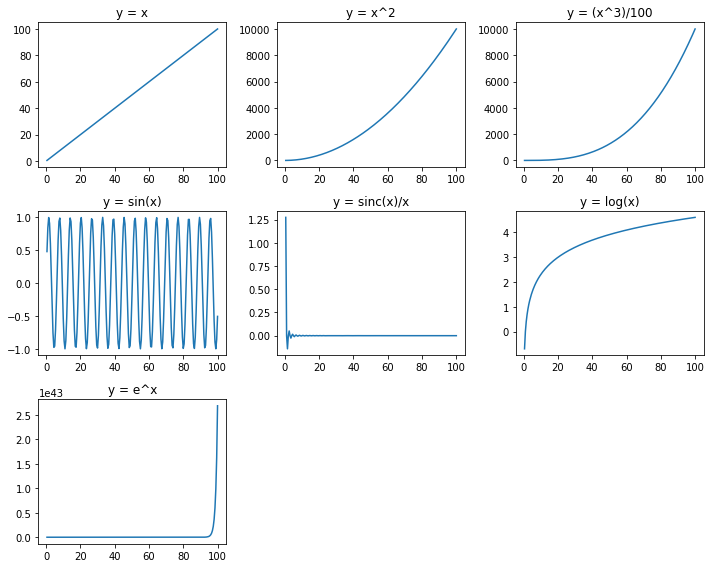

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x_values = np.arange(0.5, 100.5, 0.5)

# Define the functions
y1 = x_values
y2 = x_values**2
y3 = (x_values**3) / 100
y4 = np.sin(x_values)
y5 = np.sinc(x_values)/x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

# Plot the functions
plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
plt.plot(x_values, y1)
plt.title('y = x')

plt.subplot(3, 3, 2)
plt.plot(x_values, y2)
plt.title('y = x^2')

plt.subplot(3, 3, 3)
plt.plot(x_values, y3)
plt.title('y = (x^3)/100')

plt.subplot(3, 3, 4)
plt.plot(x_values, y4)
plt.title('y = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x_values, y5)
plt.title('y = sinc(x)/x')

plt.subplot(3, 3, 6)
plt.plot(x_values, y6)
plt.title('y = log(x)')

plt.subplot(3, 3, 7)
plt.plot(x_values, y7)
plt.title('y = e^x')

plt.tight_layout()
plt.show()


### Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [59]:
matrix_A = np.random.uniform(1, 2, size=(20, 5))

In [60]:
df = pd.DataFrame(matrix_A)

In [61]:
df

,0,1,2,3,4
0,1.702249,1.310073,1.742831,1.008401,1.796607
1,1.884483,1.794374,1.820802,1.847146,1.233730
2,1.882836,1.433435,1.629911,1.046257,1.192280
3,1.924776,1.431916,1.280092,1.077133,1.258096
4,1.416553,1.762290,1.221735,1.144525,1.545187
5,1.638171,1.076402,1.425043,1.574476,1.770607
6,1.199100,1.821343,1.963565,1.116594,1.544024
7,1.432899,1.359694,1.886669,1.412275,1.745863
8,1.112454,1.132444,1.918707,1.151590,1.420346
9,1.253749,1.138835,1.395770,1.585521,1.828025


In [62]:
col_name= ['a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(matrix_A, columns=col_name)

In [63]:
df

,a,b,c,d,e
0,1.702249,1.310073,1.742831,1.008401,1.796607
1,1.884483,1.794374,1.820802,1.847146,1.233730
2,1.882836,1.433435,1.629911,1.046257,1.192280
3,1.924776,1.431916,1.280092,1.077133,1.258096
4,1.416553,1.762290,1.221735,1.144525,1.545187
5,1.638171,1.076402,1.425043,1.574476,1.770607
6,1.199100,1.821343,1.963565,1.116594,1.544024
7,1.432899,1.359694,1.886669,1.412275,1.745863
8,1.112454,1.132444,1.918707,1.151590,1.420346
9,1.253749,1.138835,1.395770,1.585521,1.828025


In [64]:
std_deviation = df.std()
std_deviation

a    0.298050
b    0.255412
c    0.317522
d    0.288090
e    0.250726
dtype: float64

So column C is with highest standerd Deviation

In [65]:
Mean = df.mean(axis= 1)

In [66]:
Mean

0     1.512032
1     1.716107
2     1.436944
3     1.394403
4     1.418058
5     1.496940
6     1.528925
7     1.567480
8     1.347108
9     1.440380
10    1.445620
11    1.258497
12    1.440728
13    1.407816
14    1.302631
15    1.664102
16    1.466027
17    1.422075
18    1.650823
19    1.623736
dtype: float64

In [67]:
lowest_mean_row = Mean.idxmin()

In [68]:
print(f"So {lowest_mean_row} row is with lowest Mean")

So 11 row is with lowest Mean


In [69]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

In [70]:
df

,a,b,c,d,e,f
0,1.702249,1.310073,1.742831,1.008401,1.796607,7.560162
1,1.884483,1.794374,1.820802,1.847146,1.233730,8.580535
2,1.882836,1.433435,1.629911,1.046257,1.192280,7.184719
3,1.924776,1.431916,1.280092,1.077133,1.258096,6.972013
4,1.416553,1.762290,1.221735,1.144525,1.545187,7.090290
5,1.638171,1.076402,1.425043,1.574476,1.770607,7.484699
6,1.199100,1.821343,1.963565,1.116594,1.544024,7.644626
7,1.432899,1.359694,1.886669,1.412275,1.745863,7.837400
8,1.112454,1.132444,1.918707,1.151590,1.420346,6.735541
9,1.253749,1.138835,1.395770,1.585521,1.828025,7.201899


In [71]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

In [72]:
df

,a,b,c,d,e,f,g
0,1.702249,1.310073,1.742831,1.008401,1.796607,7.560162,LT8
1,1.884483,1.794374,1.820802,1.847146,1.233730,8.580535,GT8
2,1.882836,1.433435,1.629911,1.046257,1.192280,7.184719,LT8
3,1.924776,1.431916,1.280092,1.077133,1.258096,6.972013,LT8
4,1.416553,1.762290,1.221735,1.144525,1.545187,7.090290,LT8
5,1.638171,1.076402,1.425043,1.574476,1.770607,7.484699,LT8
6,1.199100,1.821343,1.963565,1.116594,1.544024,7.644626,LT8
7,1.432899,1.359694,1.886669,1.412275,1.745863,7.837400,LT8
8,1.112454,1.132444,1.918707,1.151590,1.420346,6.735541,LT8
9,1.253749,1.138835,1.395770,1.585521,1.828025,7.201899,LT8


In [77]:
lt8_count = df[df['g'] == 'LT8'].shape[0]
lt8_count

16

number of rows in the dataframe where the value in the column g is LT8 16

In [79]:
std_dev_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()
print("Standard Deviation of 'f' for rows where 'g' is 'LT8':", std_dev_lt8)
print("Standard Deviation of 'f' for rows where 'g' is 'GT8':", std_dev_gt8)

Standard Deviation of 'f' for rows where 'g' is 'LT8': 0.40037461675825964
Standard Deviation of 'f' for rows where 'g' is 'GT8': 0.19385538363666915


### Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy is a powerful mechanism that allows NumPy to perform element-wise operations on arrays of different shapes and sizes. Broadcasting automatically handles the expansion of smaller arrays to match the shape of larger arrays, making it possible to perform operations even when the arrays involved do not have the same shape.

Here's a simple example to illustrate broadcasting in NumPy

In [80]:
matrix_A = np.array([[1, 2, 3],
                     [4, 5, 6]])

# Add a scalar to every element of the matrix using broadcasting
scalar = 10
result = matrix_A + scalar

# Display the original matrix and the result
print("Original Matrix:")
print(matrix_A)

print("\nResult after Broadcasting (Adding a Scalar):")
print(result)

Original Matrix:
[[1 2 3]
 [4 5 6]]

Result after Broadcasting (Adding a Scalar):
[[11 12 13]
 [14 15 16]]


### Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [81]:
def argmin(arr):
  min = arr[0]
  mini = 0

  for i in range(len(arr)):
    if arr[i] < min:
      min = arr[i]
      mini = i
  return mini

arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
print(argmin(arr))
print(np.argmin(arr))

1
1
